In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from matplotlib import cm
warnings.filterwarnings('ignore')
pd.options.display.float_format = "{:.2f}".format
%reload_ext nb_black

# Initial analysis of Red and White wines.

### Features:
1. __Fixed Acidity__ - measure of the total concentration of titratable acids and free hydrogen ions.
2. __Volatile Acidity__ - measure of the total concentration of ‘volatile acids’ in wine.
3. __Citric Acid__ - one of three primary acids found in grapes and converted by the winemaking process.
4. __Residual Sugars__ - natural grape sugars that are leftover after fermentation ceases.
5. __Chlorides__ - The amount of chlorides in a wine is usually an indicator of its saltiness.
6. __Sulphur Dioxide levels__ - Sulphur dioxide (SO2) is used as an antioxidant and preservative and has become widely used in winemaking
7. __Density__ -  measure of the alcohol concentration in wines.
8. __pH__ - (power of hydrogen) - measure of the hydrogen ion concentration in the solution. 
9. __Sulphates__ - Salts of sulfuric acid in wine.
10. __Alcohol__



In [2]:
data_r = pd.read_csv(r'Wine\winequality_red.csv')
data_w = pd.read_csv(r'Wine\winequality_white.csv')
data_r.columns == data_w.columns # Check if red wines and white wines have same columns [features]
data_r['color'] = 'Red'
data_w['color'] = 'White'
wines = pd.concat([data_r,data_w],axis=0)
wines.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00,6497.00
mean,7.22,0.34,0.32,5.44,0.06,30.53,115.74,0.99,3.22,0.53,10.49,5.82
std,1.30,0.16,0.15,4.76,0.04,17.75,56.52,0.00,0.16,0.15,1.19,0.87
min,3.80,0.08,0.00,0.60,0.01,1.00,6.00,0.99,2.72,0.22,8.00,3.00
25%,6.40,0.23,0.25,1.80,0.04,17.00,77.00,0.99,3.11,0.43,9.50,5.00
50%,7.00,0.29,0.31,3.00,0.05,29.00,118.00,0.99,3.21,0.51,10.30,6.00
75%,7.70,0.40,0.39,8.10,0.07,41.00,156.00,1.00,3.32,0.60,11.30,6.00
max,15.90,1.58,1.66,65.80,0.61,289.00,440.00,1.04,4.01,2.00,14.90,9.00


In [3]:
mode_r,mode_w = data_r['quality'].mode(),data_w['quality'].mode()
print(f'Mode for Red wines is {int(mode_r)} and for White wine mode is {int(mode_w)}')

Mode for Red wines is 5 and for White wine mode is 6


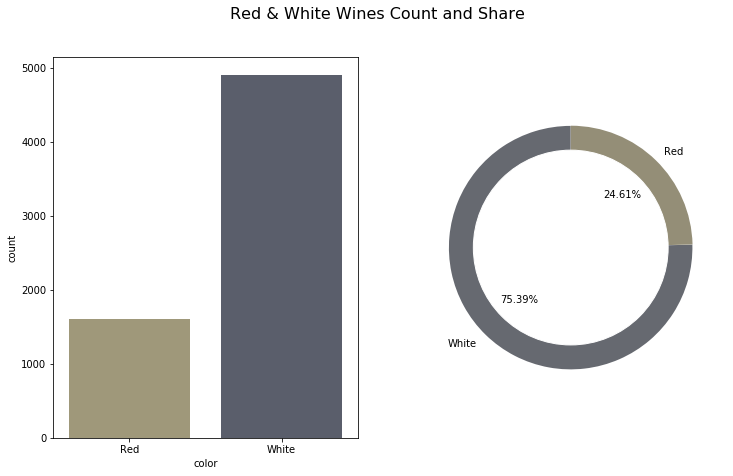

In [4]:
from matplotlib import cm
f, ax = plt.subplots(1,2,figsize=(12,7))
sns.countplot(data=wines,x='color',palette='cividis_r',ax=ax[0])
color = cm.cividis(np.linspace(.4,.6, 2))
my_circle=plt.Circle( (0,0), 0.8, color='white')
names=wines['color'].value_counts().index.tolist()
size=wines['color'].value_counts().values.tolist()
plt.pie(size, labels=names, colors=color,autopct='%1.2f%%',explode = (0.001,0.001),startangle=90)
p=plt.gcf()
p.gca().add_artist(my_circle)
f.suptitle("Red & White Wines Count and Share", fontsize=16)
plt.show()

In [5]:
quality = wines.groupby('color').agg(['mean','std','count','min','max'])['quality']
quality = quality.reset_index()

''

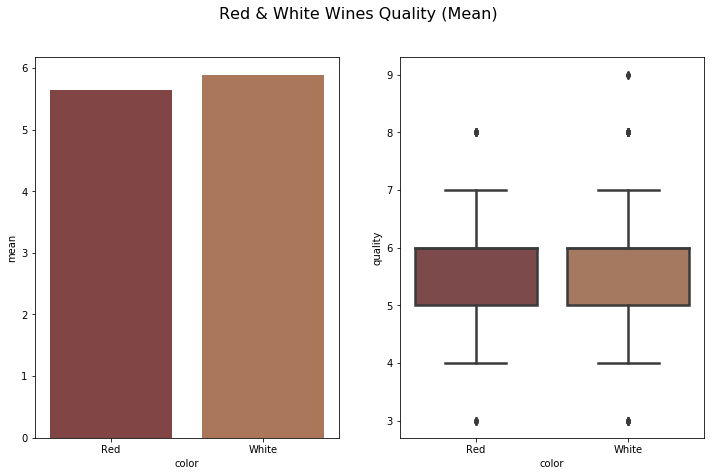

In [6]:
f, ax = plt.subplots(1,2,figsize=(12,7))
sns.barplot(data=quality,y='mean',x='color',palette='tab20b_d',saturation=0.9,ax=ax[0]);
sns.boxplot(data=wines,y='quality',linewidth=2.5,x='color',palette='tab20b_d',ax=ax[1])#showmeans=True);
f.suptitle("Red & White Wines Quality (Mean)", fontsize=16);
;

We can see that there is much more White Wines in our dataset. __75%__ of wines are white. Average quality of White wines is bigger then White wines, and also white wines has bigger max quality value.
* Red color wines: __1599__ 
* White color wines: __4898__
* Red wines average quality:  __5.64__ 
* White wines average quality:  __5.88__ 
* Red wines min quality: __3__ 
* Red wines max quality: __8__
* White wines min quality: __3__
* White wines max quality: __9__
* Mode for Red wines is __5__
* Mode for White wine is __6__

## Red Wines Analysis 
Let's split our data to red wines & white wines. First I'll try to analyse Red wines.

In [7]:
data_r.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00,1599.00
mean,8.32,0.53,0.27,2.54,0.09,15.87,46.47,1.00,3.31,0.66,10.42,5.64
std,1.74,0.18,0.19,1.41,0.05,10.46,32.90,0.00,0.15,0.17,1.07,0.81
min,4.60,0.12,0.00,0.90,0.01,1.00,6.00,0.99,2.74,0.33,8.40,3.00
25%,7.10,0.39,0.09,1.90,0.07,7.00,22.00,1.00,3.21,0.55,9.50,5.00
50%,7.90,0.52,0.26,2.20,0.08,14.00,38.00,1.00,3.31,0.62,10.20,6.00
75%,9.20,0.64,0.42,2.60,0.09,21.00,62.00,1.00,3.40,0.73,11.10,6.00
max,15.90,1.58,1.00,15.50,0.61,72.00,289.00,1.00,4.01,2.00,14.90,8.00


In [8]:
def strong(alcohol): #Function that will split our data to 4 categories
    if alcohol <= 9:
        return 'Light'
    elif alcohol >9 and alcohol <=11:
        return 'Medium'
    elif alcohol >11 and alcohol <=14:
        return 'Strong'
    else:
        return 'Very Strong'

In [9]:
#Apply our function into new column with strenght of alcohol
data_r['Strength'] = data_r['alcohol'].apply(strong) 

In [10]:
data_r.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,Strength
528,8.20,0.42,0.49,2.60,0.08,32.00,55.00,1.00,3.34,0.75,8.70,6,Red,Light
92,8.60,0.49,0.29,2.00,0.11,19.00,133.00,1.00,2.93,1.98,9.80,5,Red,Medium
475,9.60,0.68,0.24,2.20,0.09,5.00,28.00,1.00,3.14,0.60,10.20,5,Red,Medium


In [11]:
a =data_r.groupby('Strength')['Strength'].count()/len(data_r)
b =data_r.groupby('Strength')['Strength'].count()
df = pd.concat([a,b],axis=1)
df.columns = ['pct','count']

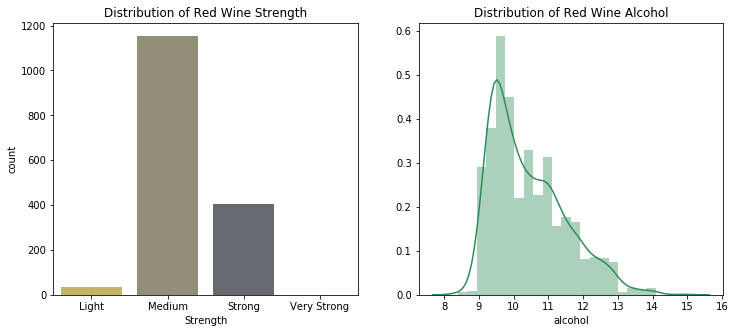

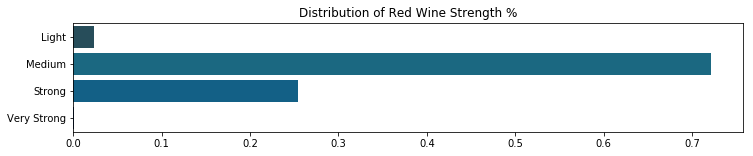

In [65]:
f, ax = plt.subplots(1,2,figsize=(12,5))
sns.countplot(x='Strength', data=data_r.sort_values(by='Strength'),palette='cividis_r',saturation=0.9,ax=ax[0]).set_title('Distribution of Red Wine Strength')

sns.distplot(data_r['alcohol'],color="seagreen",ax=ax[1]).set_title('Distribution of Red Wine Alcohol');
plt.figure(figsize=(12,2))
sns.barplot(data=df, x='pct',y=df.index,palette='ocean_d',saturation=0.75).set_title('Distribution of Red Wine Strength %');
plt.xlabel('')
plt.ylabel('');

We can see that most of wines are in "medium" group which is from 9-11 alcohol.
* Light:	__37__ _(2.31%)_
* Medium:	__1154__ _(72.17%)_
* Strong:	__407__ _(25.45%)_
* Very Strong:	__1__ _(0.06%)_

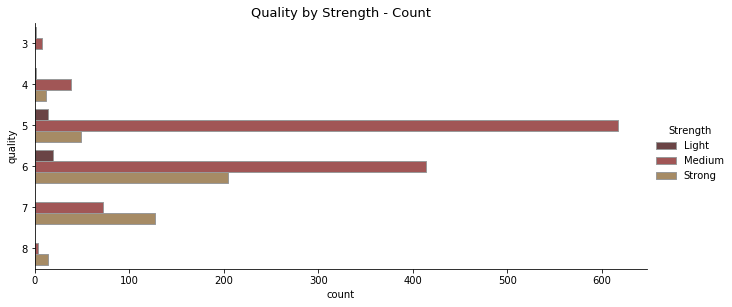

In [50]:
sns.catplot(y="quality", hue="Strength", kind="count",
            palette="tab20b_d", edgecolor=".6",
            data=data_r[data_r['Strength']!='Very Strong'].sort_values(by='Strength'),height=4, aspect=2.3);
plt.title('Quality by Strength - Count',fontsize=13);

In [41]:
data_r.groupby(['quality','Strength'])['Strength'].count()/data_r.groupby(['quality'])['Strength'].count()

quality  Strength   
3        Light         0.20
         Medium        0.80
4        Light         0.04
         Medium        0.74
         Strong        0.23
5        Light         0.02
         Medium        0.91
         Strong        0.07
         Very Strong   0.00
6        Light         0.03
         Medium        0.65
         Strong        0.32
7        Medium        0.36
         Strong        0.64
8        Medium        0.22
         Strong        0.78
Name: Strength, dtype: float64

#### We can see that for wines with quality in range from 3 to 6 most % of wines are medium strength.
* Quality 3 - 80% Medium, 20% Light
* Quality 4 - 74% Medium, 23% Strong, 4% Light
* Quality 5 - 91% Medium, 7% Strong, 2% Light and ~1% Very Strong
* Quality 6 - 65% Medium, 32% Strong, 3% Light
* Quality 7 - 64% Strong, 36% Medium
* Quality 8 - 78% Strong, 22% Medium  

Very instresting is that in wine groups from 6 quality score share of Strong Wines is increasing.

In [171]:
def quality(q): #Function that will split our data 3 categories of quality
    if q >=7:
        return 'Good'
    elif q<7 and q>=5: 
        return 'Average'
    else:
        return 'Bad'

In [172]:
data_r['rating'] = data_r['quality'].apply(quality)

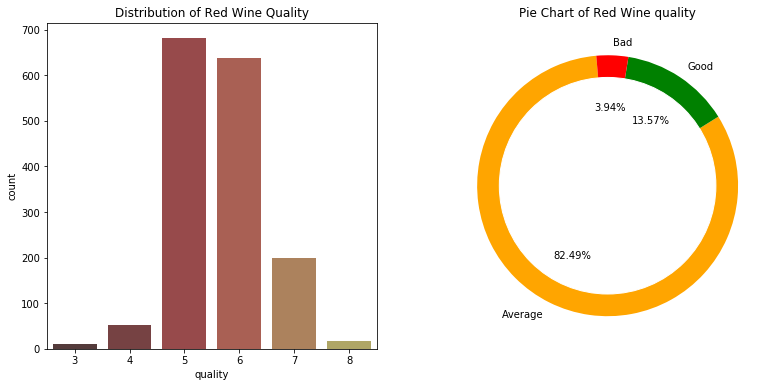

In [196]:
f, ax = plt.subplots(1,2,figsize=(13,6))
sns.countplot(x='quality', data=data_r.sort_values(by='quality'),palette='tab20b_d',saturation=0.9,ax=ax[0]).set_title('Distribution of Red Wine Quality');
#sns.countplot(x='rating', data=data_r.sort_values(by='rating'),palette='Oranges',saturation=0.9,ax=ax[1]).set_title('Distribution of Red Wine Quality');
c1 = ['orange','green','red']
my_circle=plt.Circle( (0,0), 0.83, color='white')
names=data_r['rating'].unique().tolist()
size=data_r['rating'].value_counts().tolist()
plt.pie(size, labels=names, colors=c1,autopct='%1.2f%%',startangle=95)
p=plt.gcf()
plt.title('Pie Chart of Red Wine quality')
p.gca().add_artist(my_circle);

We can see that most of wines are Average Quality which is 5 and 6 quality points. 
__4%__ of wines are bad quality. 
__13.57%__ are good quality
__82.5%__ are Average.
 

In [290]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 12.7,8.2
sns.set(style='white')

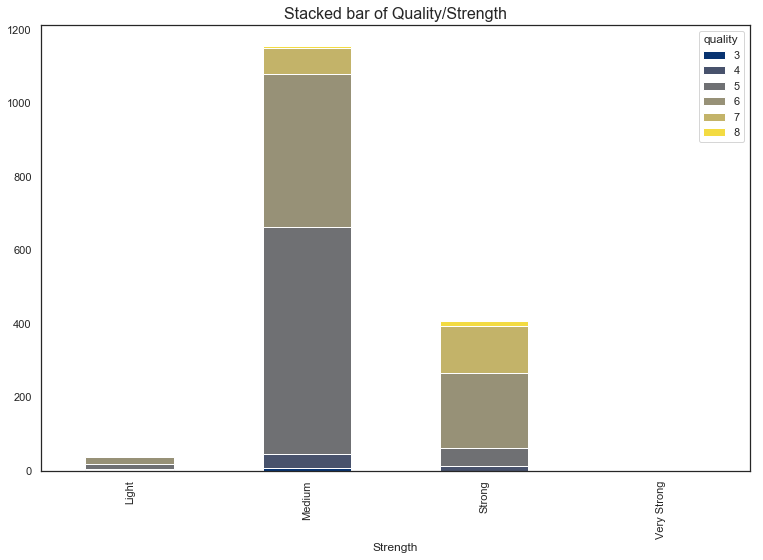

In [292]:

c1 = cm.cividis(np.linspace(.1,1.29, 8))
g = data_r.groupby(['quality','Strength'])['quality'].count()
g = g.sort_values(ascending=False)
g = pd.DataFrame(g)
g = g.rename(columns={'quality':'counts'})
g = g.sort_values(by='counts',ascending=True)
g = g.reset_index()
g = g.sort_values(by=['quality','Strength'],ascending=True)
g = g.pivot(index='Strength',columns='quality',values='counts')
g.plot(kind='bar',stacked=True,color=c1).set_title('Stacked bar of Quality/Strength',fontsize=16);

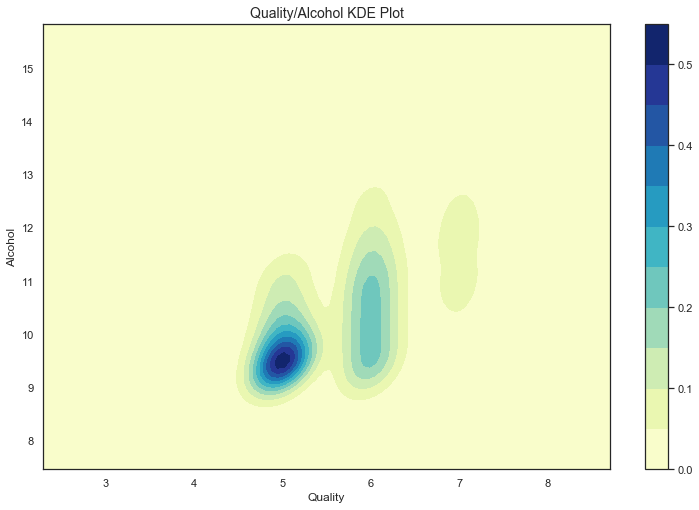

In [310]:
r1 = data_r[['quality','alcohol']]
sns.set_style("white")
sns.kdeplot(r1,cmap="YlGnBu",cbar=True,shade=True,kernel='biw',
            bw='silverman',cut=3).set_title('Quality/Alcohol KDE Plot',fontsize=14)
plt.xlabel('Quality')
plt.ylabel('Alcohol');

In [313]:
data_r.groupby('quality')['alcohol'].agg(['mean','std','count','min','max'])

,mean,std,count,min,max
quality,,,,,
3,9.96,0.82,10,8.40,11.00
4,10.27,0.93,53,9.00,13.10
5,9.90,0.74,681,8.50,14.90
6,10.63,1.05,638,8.40,14.00
7,11.47,0.96,199,9.20,14.00
8,12.09,1.22,18,9.80,14.00
